# Homework 3: Classification

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [107]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [108]:
df_default=pd.get_dummies(df['default'])
df_student=pd.get_dummies(df['student'])
display(df_default.head())
print('df_default')
display(df_student.head())
print('df_student')

,No,Yes
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0


df_default


,No,Yes
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0


df_student


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

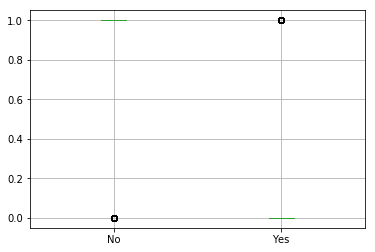

In [109]:
df_default.boxplot()

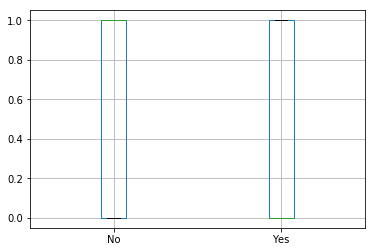

In [110]:
df_student.boxplot()

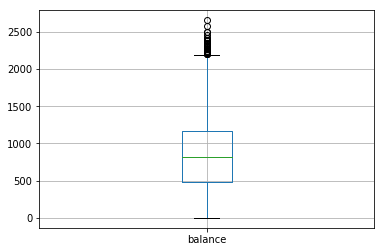

In [111]:
df[['balance']].boxplot()

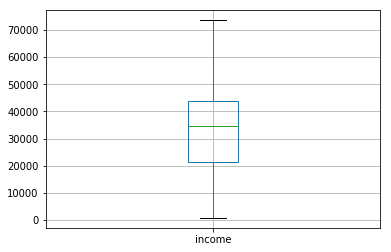

In [112]:
df[['income']].boxplot()

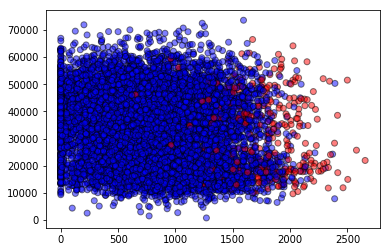

In [113]:
color = np.where(df_default['No']==1,'b', 'r')
plt.scatter(df['balance'],df['income'], alpha=0.5, c=color, edgecolor='black')

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based solely
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

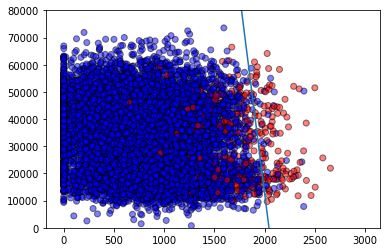

Area under the ROC curve : 0.960663


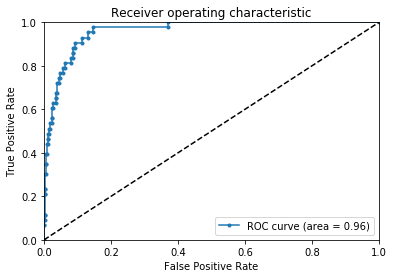

In [114]:
X = df[['balance','income']]
y = df_default['Yes']

regr = LogisticRegression(penalty='l1')
regr.fit(X, y)

# Decision Boundary
w = regr.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000, 50)
yy = a * xx - (regr.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.scatter(df['balance'],df['income'], alpha=0.5, c=color, edgecolor='black')
plt.ylim([0.0, 80000])
plt.show()

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

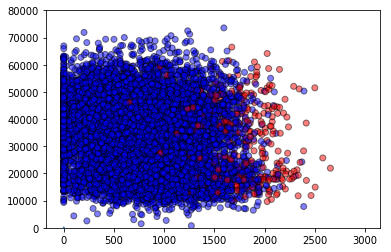

Area under the ROC curve : 0.962152


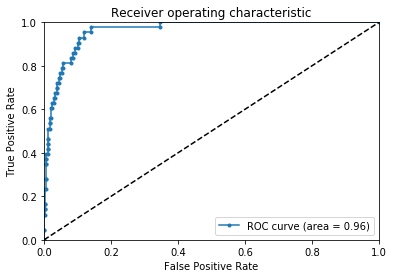

In [115]:
X_new = pd.concat([df[['balance','income']], df_student['Yes']], axis=1)
y_new = df_default['Yes']

scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

regr = LogisticRegression(penalty='l1')
regr.fit(X_new, y_new)

# Decision Boundary
w = regr.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000, 50)
yy = a * xx - (regr.intercept_[0]) / w[1]
plt.plot(xx, yy)
plt.scatter(df['balance'],df['income'], alpha=0.5, c=color, edgecolor='black')
plt.ylim([0.0, 80000])
plt.show()

# Computes the AUC ROC of the classifier.
def generate_auc(X_new,y_new,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X_new, y_new = shuffle(X_new, y_new, random_state=random_state)
    n_samples, n_features = X_new.shape
    half = int(n_samples/1.2)
    X_train_new, X_test_new = X_new[:half], X_new[half:]
    y_train_new, y_test_new = y_new[:half], y_new[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train_new, y_train_new).predict_proba(X_test_new)
    
    fpr, tpr, thresholds = roc_curve(y_test_new, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X_new,y_new,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

Area under the ROC curve : 0.947188
Area under the ROC curve : 0.947202
Area under the ROC curve : 0.947230
Area under the ROC curve : 0.947302
Area under the ROC curve : 0.947402
Area under the ROC curve : 0.947474
Area under the ROC curve : 0.947588
Area under the ROC curve : 0.947732
Area under the ROC curve : 0.947904
Area under the ROC curve : 0.948047
Area under the ROC curve : 0.948276
Area under the ROC curve : 0.948419
Area under the ROC curve : 0.948505
Area under the ROC curve : 0.948806
Area under the ROC curve : 0.949264
Area under the ROC curve : 0.949808
Area under the ROC curve : 0.950481
Area under the ROC curve : 0.951140
Area under the ROC curve : 0.951842
Area under the ROC curve : 0.952844
Area under the ROC curve : 0.953689
Area under the ROC curve : 0.954620
Area under the ROC curve : 0.955350
Area under the ROC curve : 0.956238
Area under the ROC curve : 0.957054
Area under the ROC curve : 0.957598
Area under the ROC curve : 0.958343
Area under the ROC curve : 0

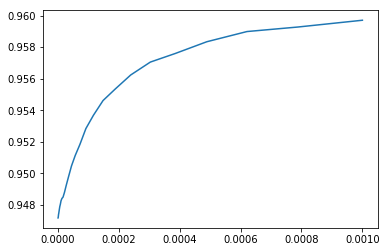

Alpha best:  0.001
Coefficients:  [[ 0.25068336  0.00797513 -0.00196022]]


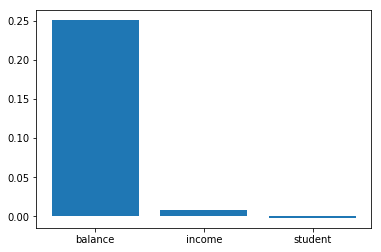

In [118]:
alphas = np.logspace(-6,-3,30)
scores = []

for alpha in alphas:
    regr_ridge = LogisticRegression(C=alpha,penalty='l2')
    fpr, tpr, roc_auc, thresholds= generate_auc(X_new,y_new,LogisticRegression,C=alpha,penalty='l2')
    scores.append(roc_auc)
plt.plot(alphas,scores)
plt.show()

alpha_best = alphas[np.argmax(scores)]
print("Alpha best: ", alpha_best)
regr_ridge = LogisticRegression(C=alpha_best,penalty='l2')
regr_ridge.fit(X_new,y_new)
print("Coefficients: ", regr_ridge.coef_)

plt.bar(np.arange(3), regr_ridge.coef_[0], tick_label=['balance','income','student'])
plt.show()

Comparing the areas under the ROC curve, performance improvement looks negligible.

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

[0.96651674 0.96651674 0.9665     0.96598299 0.96648324]


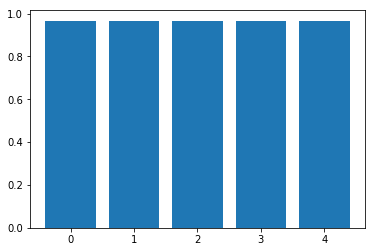

In [119]:
val = cross_val_score(regr_ridge, X, y, cv=5)
print(val)
plt.bar(np.arange(5),val)
plt.show()

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

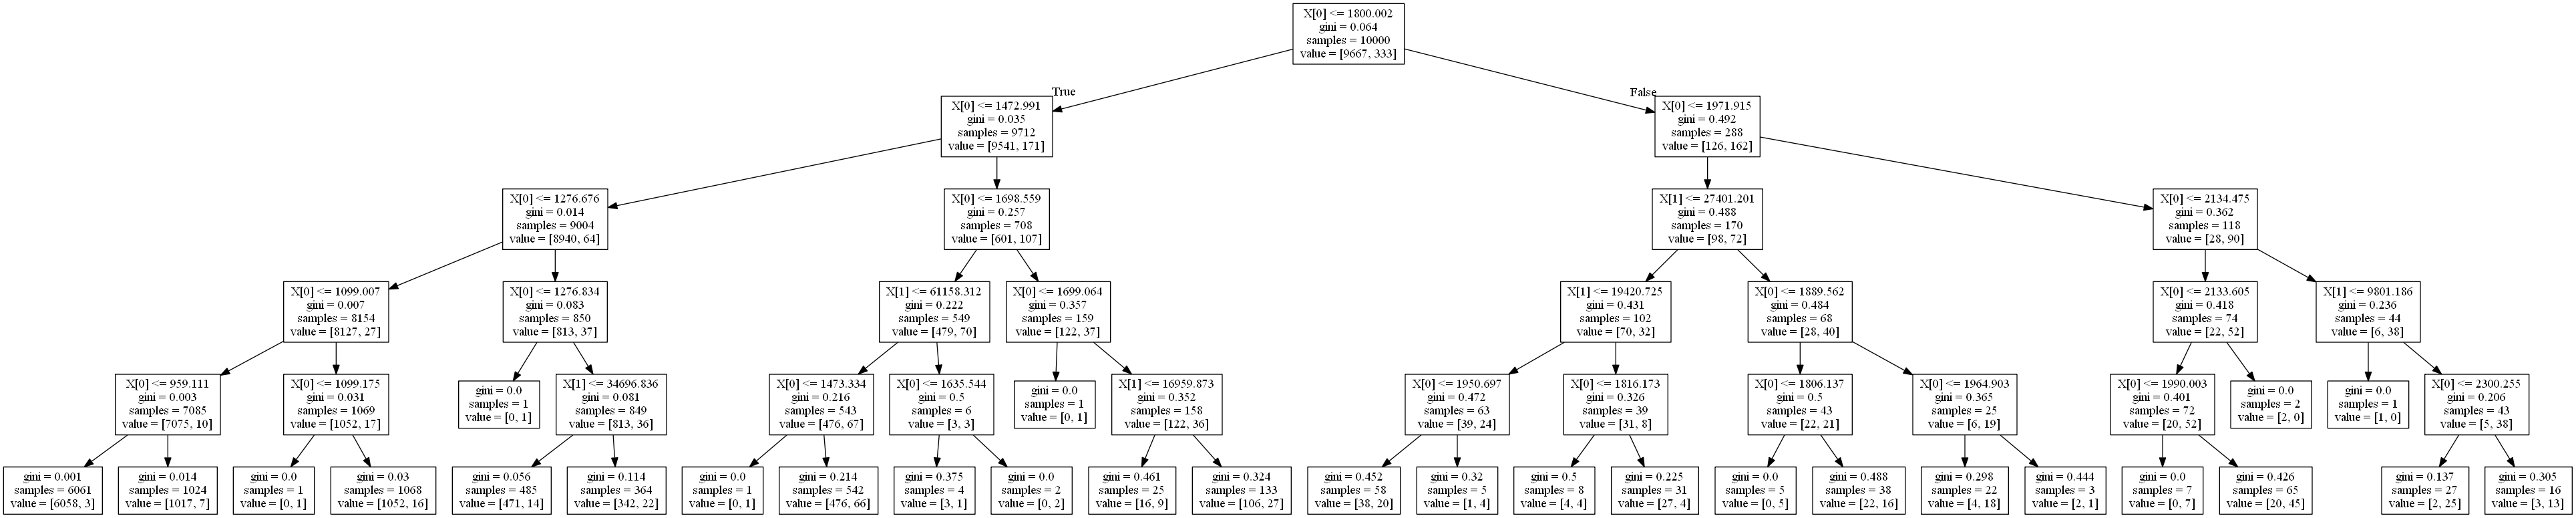

In [120]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris
import graphviz
import pydotplus
from IPython.display import Image  



clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

dot_data=export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

8) Find the optimal decision tree depth and compute the AUC ROC. 

Optimal depth is  3


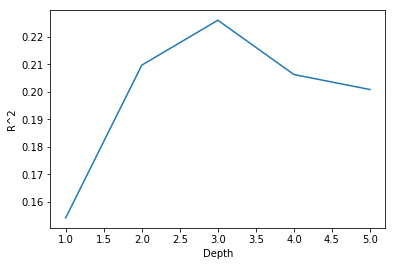

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]
print("Optimal depth is ", n_opt)


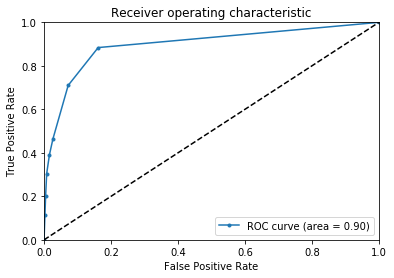

In [122]:
regr_opt = DecisionTreeRegressor(max_depth=n_opt)
regr_opt.fit(X_train, y_train)
fpr, tpr, thresholds = roc_curve(y_test, regr_opt.predict(X_test))
roc_auc = auc(fpr, tpr)
generate_ROCplot(fpr,tpr,'Decision Tree', roc_auc)